In [1]:
import pandas as pd
from tqdm import tqdm_notebook
import warnings
import json
import os 
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
warnings.filterwarnings('ignore')

# SkuChangeRequests_200k_2

In [2]:
columns = ['Номер заявки', 'Форма заявки', 'Наименование', 'Единица измерения', 'Изображение', 'Классификация ГОСТ/ТУ', 'Описание', 'Статус', 'Причина отказа', 'Комментарий', 'Ид оферты', 'Наименование оферты', 'Артикул оферты', 'Регион поставки', 'Срок поставки в днях От', 'Срок поставки в днях До', 'Доступное количество От', 'Доступное количество До', 'Исходные характеристики', 'Категория оферты', 'Категория справочника', 'Вид продукции', 'Количество эталонных утвержденных характеристик в категории', 'Количество использованных поставщиком эталонных утвержденных характеристик']

In [6]:
SkuChangeRequests = pd.read_csv("data/SkuChangeRequests.csv", dtype={col:str for col in columns}, sep=',', nrows=10)

### Частые причины отказа

In [38]:
print("Уникальных причин отказа: ", len(SkuChangeRequests['Причина отказа'].unique()))

Уникальных причин отказа:  6473


In [26]:
SkuChangeRequests['Причина отказа'].value_counts().head(5)

Время редактирования заявки истекло.                                                                                                   15970
Предложен другой СТЕ                                                                                                                    7955
предложенных характеристик недостаточно для сопоставления СТЕ                                                                           4298
изображение не должно содержать логотипа, оттисков печатей, водяных знаков, QR-кода, ссылок на веб-ресурсы, а также иных документов     3960
предложенных характеристик недостаточно для сопоставления СТЕ;необходимо выделить перечень значимых характеристик                       2532
Name: Причина отказа, dtype: int64

### Исходные характеристики в JSON формат

In [32]:
a = SkuChangeRequests['Исходные характеристики'].values[0]

In [34]:
print(a)
print(type(a))

[{"name":"Производитель","value":"ИЭК"},{"name":"Количество в рулоне","value":"20","unitCode":"Метр"},{"name":"Размеры","value":"0.18х19","unitCode":"Миллиметр"},{"name":"Вид продукции","value":"Товары","unitCode":null,"productCharacteristicId":1},{"name":"Вид товаров","value":"Товары для ремонта или строительства","unitCode":null,"productCharacteristicId":1100913},{"name":"Вид товаров для ремонта или строительства","value":"Материал","unitCode":null,"productCharacteristicId":1103207},{"name":"Вид материала","value":"Строительный материал","unitCode":null,"productCharacteristicId":1103209},{"name":"Вид строительного материала","value":"Изоляционный материал","unitCode":null,"productCharacteristicId":1103215},{"name":"Вид изоляционных материалов","value":"Электроизоляционный","unitCode":null,"productCharacteristicId":1103219},{"name":"Цвет","value":"желто/желеный","unitCode":null,"productCharacteristicId":12175525},{"name":"Материал изоляции","value":"ПВХ","unitCode":null,"productCharac

In [35]:
json.loads(a)

[{'name': 'Производитель', 'value': 'ИЭК'},
 {'name': 'Количество в рулоне', 'value': '20', 'unitCode': 'Метр'},
 {'name': 'Размеры', 'value': '0.18х19', 'unitCode': 'Миллиметр'},
 {'name': 'Вид продукции',
  'value': 'Товары',
  'unitCode': None,
  'productCharacteristicId': 1},
 {'name': 'Вид товаров',
  'value': 'Товары для ремонта или строительства',
  'unitCode': None,
  'productCharacteristicId': 1100913},
 {'name': 'Вид товаров для ремонта или строительства',
  'value': 'Материал',
  'unitCode': None,
  'productCharacteristicId': 1103207},
 {'name': 'Вид материала',
  'value': 'Строительный материал',
  'unitCode': None,
  'productCharacteristicId': 1103209},
 {'name': 'Вид строительного материала',
  'value': 'Изоляционный материал',
  'unitCode': None,
  'productCharacteristicId': 1103215},
 {'name': 'Вид изоляционных материалов',
  'value': 'Электроизоляционный',
  'unitCode': None,
  'productCharacteristicId': 1103219},
 {'name': 'Цвет',
  'value': 'желто/желеный',
  'unitCo

# sku_images

### Распаковка архива

Windows - 7-Zip (https://www.7-zip.org/) <br>
Ubuntu - Команда в консоль: 7z x sku_images.7z

In [43]:
from os import listdir
from os.path import isfile, join

In [51]:
mypath = 'data/sku_images/sku_images'
onlyfiles = []

#listdir - возвращает файлы в директории
for f in listdir(mypath):
    #isfile - проверка на обычный файл
    if isfile(join(mypath, f)):
        onlyfiles.append(f)

In [69]:
#отделение имени файла от расширения
file_names = set([i.split(".")[0] for i in onlyfiles])

In [70]:
print(len(file_names))

196082


### Проверка на пересечение файлов из папки с полем "Изображения" в SkuChangeRequests

In [74]:
file_names_from_table = set(SkuChangeRequests['Изображение'].fillna('None').values)

In [75]:
file_names_from_table.remove("None")

In [82]:
exists_file = file_names_from_table.intersection(file_names)

In [83]:
print("Пересечение: ", len(exists_file))

Пересечение:  177813


In [89]:
random.sample(exists_file, 1)

['2090302939']

### Просмотр изображения

In [111]:
path = "data/sku_images/sku_images/"

In [112]:
def show_image(path, img):
    img = mpimg.imread(path + img)
    imgplot = plt.imshow(img)
    plt.show()

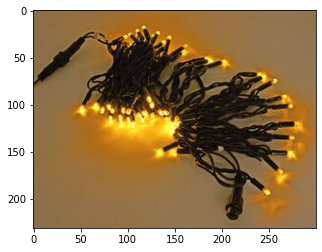

In [113]:
show_image(path, '2090302939.jpg')

# Просмотр СТЕ

In [118]:
def get_ste_info(df_row):
    print("Номер заявки: ", df_row['Номер заявки'].values[0])
    print("Статус: ", df_row['Статус'].values[0])
    print("Наименование: ", df_row['Наименование'].values[0])
    show_image(path, df_row['Изображение'].values[0] + ".jpg")

Номер заявки:  0872943-21
Статус:  Принята
Наименование:  Сетевой фильтр ZIS Pilot m MAX на 4 розетки 7 метров


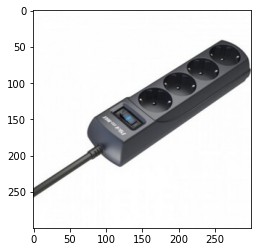

In [122]:
get_ste_info(SkuChangeRequests.sample(1))